In [981]:
import sys
sys.path.append('../') 

import MetaTrader5 as mt5
import pytz
import numpy as np

from datetime import datetime
from terminal.Extensions.Mt5Helper import Mt5Helper

In [982]:
mt5.initialize()

True

In [983]:
from_date = datetime(2024, 5, 16, tzinfo=pytz.utc)
to_date = datetime(from_date.year, from_date.month, from_date.day, 23, 59, 59, 0, tzinfo=pytz.utc)

In [984]:
data = mt5.copy_ticks_range('WINM24', from_date, to_date, mt5.COPY_TICKS_TRADE)

array([<Axes: xlabel='time_msc'>], dtype=object)

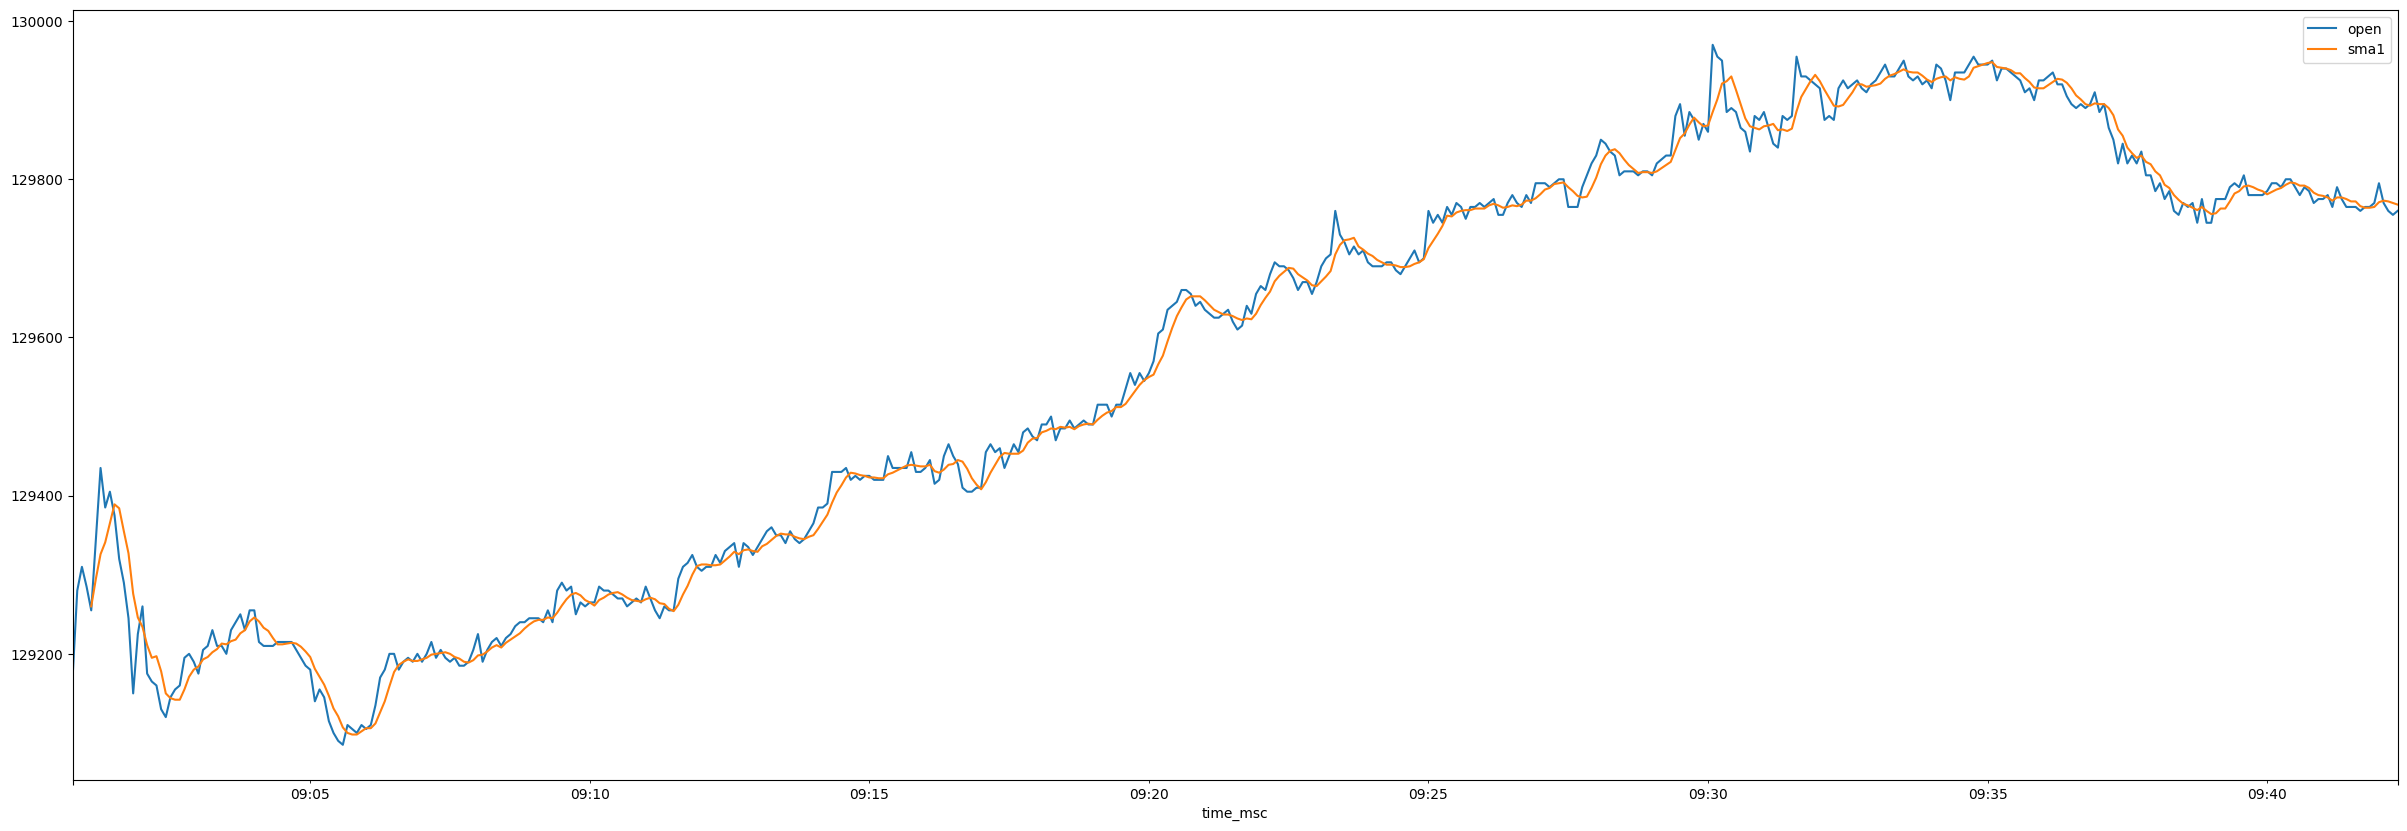

In [985]:
rates = Mt5Helper.OHLC(data, '5s')
rates['sma1'] = rates['open'].rolling(5).mean()
rates.iloc[0:500][['open', 'sma1']].plot(
    kind="line", 
    subplots=[('open', 'sma1')], 
    figsize=(30,10))

In [986]:

sum_position = 0
sum_position_quantity = 0

profit = 0

max_quantity = 0

for i, item in rates.iterrows(): 

    if item.open != item.open: 
        continue
    
    buy = item.sma1 > item.open
    
    # posição comprada, sinal de venda
    if sum_position_quantity > 0 and not buy: 
        average_buy_price = sum_position / abs(sum_position_quantity)
        profit += (item.open - average_buy_price) * abs(sum_position_quantity)
        sum_position = 0
        sum_position_quantity = 0
        
    # posição vendida, sinal de compra
    elif sum_position_quantity < 0 and buy: 
        average_sell_price = sum_position / abs(sum_position_quantity)
        profit += (average_sell_price - item.open) * abs(sum_position_quantity)
        sum_position = 0
        sum_position_quantity = 0
    
    # sinal de compra
    elif buy: 
        sum_position += item.open
        sum_position_quantity += 1
      
    # sinal de venda
    else: 
        sum_position += item.open
        sum_position_quantity -= 1

    if abs(sum_position_quantity) > max_quantity: 
        max_quantity = abs(sum_position_quantity)
    
print(f'sum_position: {sum_position}')
print(f'sum_position_quantity: {sum_position_quantity}')
print(f'profit: {profit}')
print(f'max_quantity: {max_quantity}')



sum_position: 0
sum_position_quantity: 0
profit: 13970.000000000364
max_quantity: 27
